In [2]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import *

In [5]:
## read the csv into the panda dataframe
os.chdir('./')
TTMCuNP=pd.read_csv('fig.3e.csv') 
TTMCuNP_df=pd.DataFrame(TTMCuNP) 
TTMCuNP_df=TTMCuNP_df.iloc[2:,:4]
TTMCuNP_df.columns = ['pH', 'U', 'ION', 'Cu']
CuNP=pd.read_csv('fig.3d.csv') 
CuNP_df=pd.DataFrame(CuNP) 
CuNP_df=CuNP_df.iloc[2:,:3]
CuNP_df.columns = ['pH', 'U', 'Cu']

print(CuNP_df)
print(TTMCuNP_df)

       pH      U        Cu
2     5.5  -0.15  -0.56638
3     5.6  -0.15  -1.14035
4     5.7  -0.15  -1.71432
5     5.8  -0.15  -2.28829
6     5.9  -0.15  -2.86225
...   ...    ...       ...
8557  NaN    NaN       NaN
8558  NaN    NaN       NaN
8559  NaN    NaN       NaN
8560  NaN    NaN       NaN
8561  NaN    NaN       NaN

[8560 rows x 3 columns]
        pH      U       ION            Cu
2      6.0   -3.1  -0.21516           NaN
3      6.1   -3.1  -0.78913           NaN
4      6.2   -3.1  -1.36309           NaN
5      6.3   -3.1  -1.93706           NaN
6      6.4   -3.1  -2.51103           NaN
...    ...    ...       ...           ...
8557  11.8  0.656  -33.5053           NaN
8558  11.9  0.650       NaN  -162.7160225
8559  11.9  0.650  -34.0792           NaN
8560  12.0  0.644       NaN  -163.2899898
8561  12.0  0.644  -34.6532           NaN

[8560 rows x 4 columns]


In [41]:
##Create a colormap using hex color number
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Midpoint for contrast adjustment
   
    
def create_custom_colormap(hex_color, name='custom_colormap', n=256, contrast_factor=2.0):
    rgb_color = [int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4)]
    color_map = LinearSegmentedColormap.from_list(name, [rgb_color,(1,1,1)], N=n)
    return color_map

#def create_custom_colormap(name='custom_colormap', n=256):
    # Define color stops to create a gradient from beige to brown and light blue to darker blue
    # The colors here are estimated, you might need to adjust them to match your images
    #color_stops = [
   #     # Beige to brown gradient
        #(0.72, 0.49, 0.38),  # Medium brown
       # (0.82, 0.65, 0.52),  # Light brown
       # (0.92, 0.80, 0.68),  # Very light brown
      #  (0.86, 0.86, 0.76),  # normal beige
       # (0.90, 0.90, 0.80),  # medium beige
       # (0.94, 0.94, 0.84),  # light beige
        
  #  ]
    
     #Create the colormap with increased contrast
   # color_map = LinearSegmentedColormap.from_list(name, color_stops, N=n)
    #return color_map
    
    
# Create the custom colormap
#custom_cmap = create_custom_colormap(hex_color)

# Use the colormap
#gradient_cmap = create_gradient_colormap()
    
#'#82b7a3','#e4efd3','#f5ddd0','#c7e1f3','#e4f5ec',

hex_color = 'C6A477'
copper_modified = create_custom_colormap(hex_color)
new_copper = ListedColormap(copper_modified(np.linspace(0, 1, 256)))


Blues_modified = create_custom_colormap('6D97B1')
##Blues_modified = cm.get_cmap('Blues_r', 256)
new_blues = ListedColormap(Blues_modified(np.linspace(0, 1, 256)))


['Arial']


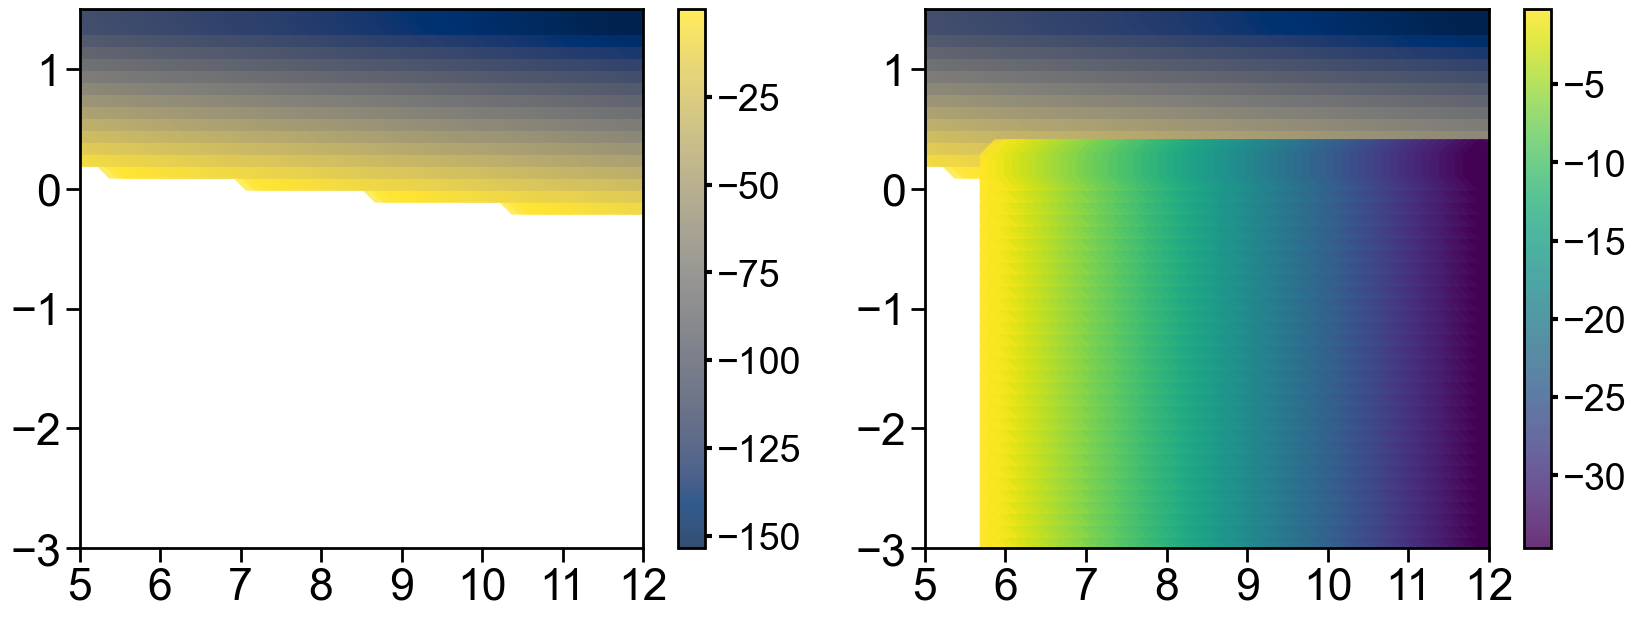

In [ ]:
plt.rcParams.update({'font.family':'Arial'})
plt.rcParams.update({'font.size': 32})   #font size
print(plt.rcParams['font.family'])
fig, axs = plt.subplots(1, 2,figsize=(20,7))  #figure size
for i, df_name in enumerate(['CuNP_df', 'TTMCuNP_df']):
    df_i = eval(f"{df_name}")
    for col_name in ['Cu','ION']:
        #Skip draw the ION for CuNP
        if df_name=='CuNP_df':
            if col_name=='ION':
                break
                #coudl we tryy to plot pcolormesh rather than the scatter?
        sc = axs[i].scatter(df_i['pH'], df_i['U'],edgecolor='none',linewidth=0,
                            s=40**2,marker='8',
                            #cmap=new_copper if col_name =='Cu' else new_blues,
                            cmap='cividis' if col_name =='Cu' else 'viridis',
                            c=df_i[col_name],
                            #viridis,
                            alpha=0.8)#,
                            #s=100)
        if df_name=='CuNP_df':
            cbar = plt.colorbar(sc, ax=axs[i],
                                orientation='vertical', 
                                pad=0.05,
                               )
            #cbar.minorticks_on()
            cbar.ax.tick_params(labelsize=27,length=5,width=3)
            cbar.outline.set_linewidth(2) 
            #cbar.ax.colorbar.tick_params(labelsize=16)
            #set axis fontsize and range.
            
        if 'ION' in col_name:
            cbar = plt.colorbar(sc, ax=axs[i], orientation='vertical', pad=0.05)
            cbar.ax.tick_params(labelsize=27,length=5,width=3)
            cbar.outline.set_linewidth(2)
        
#set colorbar tickst Cu 0-150-25 ION 0-50-10
#        cbar.ax.tick_params(fontsize=20)
        axs[i].set_xlabel('pH Values')
        axs[i].set_ylabel('Potential of CuNP (V vs. RHE)')
        axs[i].set_xlim(5.0,12.0)
        axs[i].set_ylim(-3,1.5)
        xlabel=np.arange(5,12.1)
        axs[i].set_xticks(xlabel)
        bwid=2
        axs[i].spines['bottom'].set_linewidth(bwid)
        axs[i].spines['top'].set_linewidth(bwid)
        axs[i].spines['left'].set_linewidth(bwid)
        axs[i].spines['right'].set_linewidth(bwid)
        axs[i].tick_params(which = 'major',length=10, width=2) 
        #Set square
        #axs[i].set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
os.chdir(r'./')
fig.savefig('.tif',dpi=600,transparent=True)
fig.savefig('ab.svg',dpi=600,format='svg',transparent=True)